In [31]:
import os
from pathlib import Path
import re

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# About
__Date__: 02/14/25  
__Author__: Pat McCornack  
__Purpose__: Combines all sci sites into a single file.   

# Read in Data

In [ ]:
root_dir = Path().resolve().parents[1]
data_dir = root_dir / 'data' / '02-clean'

outfpath = data_dir / 'combined-sites.csv'

In [33]:
# Create dictionary of files with site names
file_names = [f for f in os.listdir(data_dir) if f.endswith('.csv')]

# Extract substring between 'sci-' and '-clean'
site_names = [re.search(r'sci-(.*?)-clean', filename).group(1) for filename in file_names if re.search(r'sci-(.*?)-clean', filename)]

file_dict = dict(zip(site_names, file_names))
file_dict

{'wrdg': 'sci-wrdg-clean.csv',
 'sauc': 'sci-sauc-clean.csv',
 'cpin': 'sci-cpin-clean.csv',
 'crak': 'sci-crak-clean.csv',
 'crat': 'sci-crat-clean.csv',
 'eend': 'sci-eend-clean.csv',
 'erdg': 'sci-erdg-clean.csv',
 'cair': 'sci-cair-clean.csv',
 'pozo-smo2': 'sci-pozo-smo2-clean-2021-2023.csv',
 'christy-airstrip': 'sci-christy-airstrip-clean-2021-2023.csv',
 'upem': 'sci-upem-clean.csv'}

In [34]:
# Combine files
df = pd.DataFrame()
for key, value in file_dict.items():
    fpath = data_dir / value
    site_df = pd.read_csv(fpath)
    site_df['site'] = key

    df = pd.concat([df, site_df], join='outer', axis=0)

# For now, remove christy airstrip
df = df.loc[df['site'] != 'christy-airstrip']

# Drop the extra index column
df.drop('Unnamed: 0', axis=1, inplace=True)

df.head(3)

,time (PST),fog,air temperature (C),relative humidity (%),wind speed (m/s),wind gust (m/s),wind direction (deg),rain (mm),par (micromol/m2/s),dew point (C),leaf wetness,soil moisture,fog tips,site,solar radiation (kwm2),atm pressure (mb),leaf wetness (mv),solar radiation (wm2),atm pressure (kpa),leaf wetness (%)
0,2004-04-05 14:30:00,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,wrdg,NaN,NaN,NaN,NaN,NaN,NaN
1,2004-04-05 14:45:00,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,wrdg,NaN,NaN,NaN,NaN,NaN,NaN
2,2004-04-05 15:00:00,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,wrdg,NaN,NaN,NaN,NaN,NaN,NaN


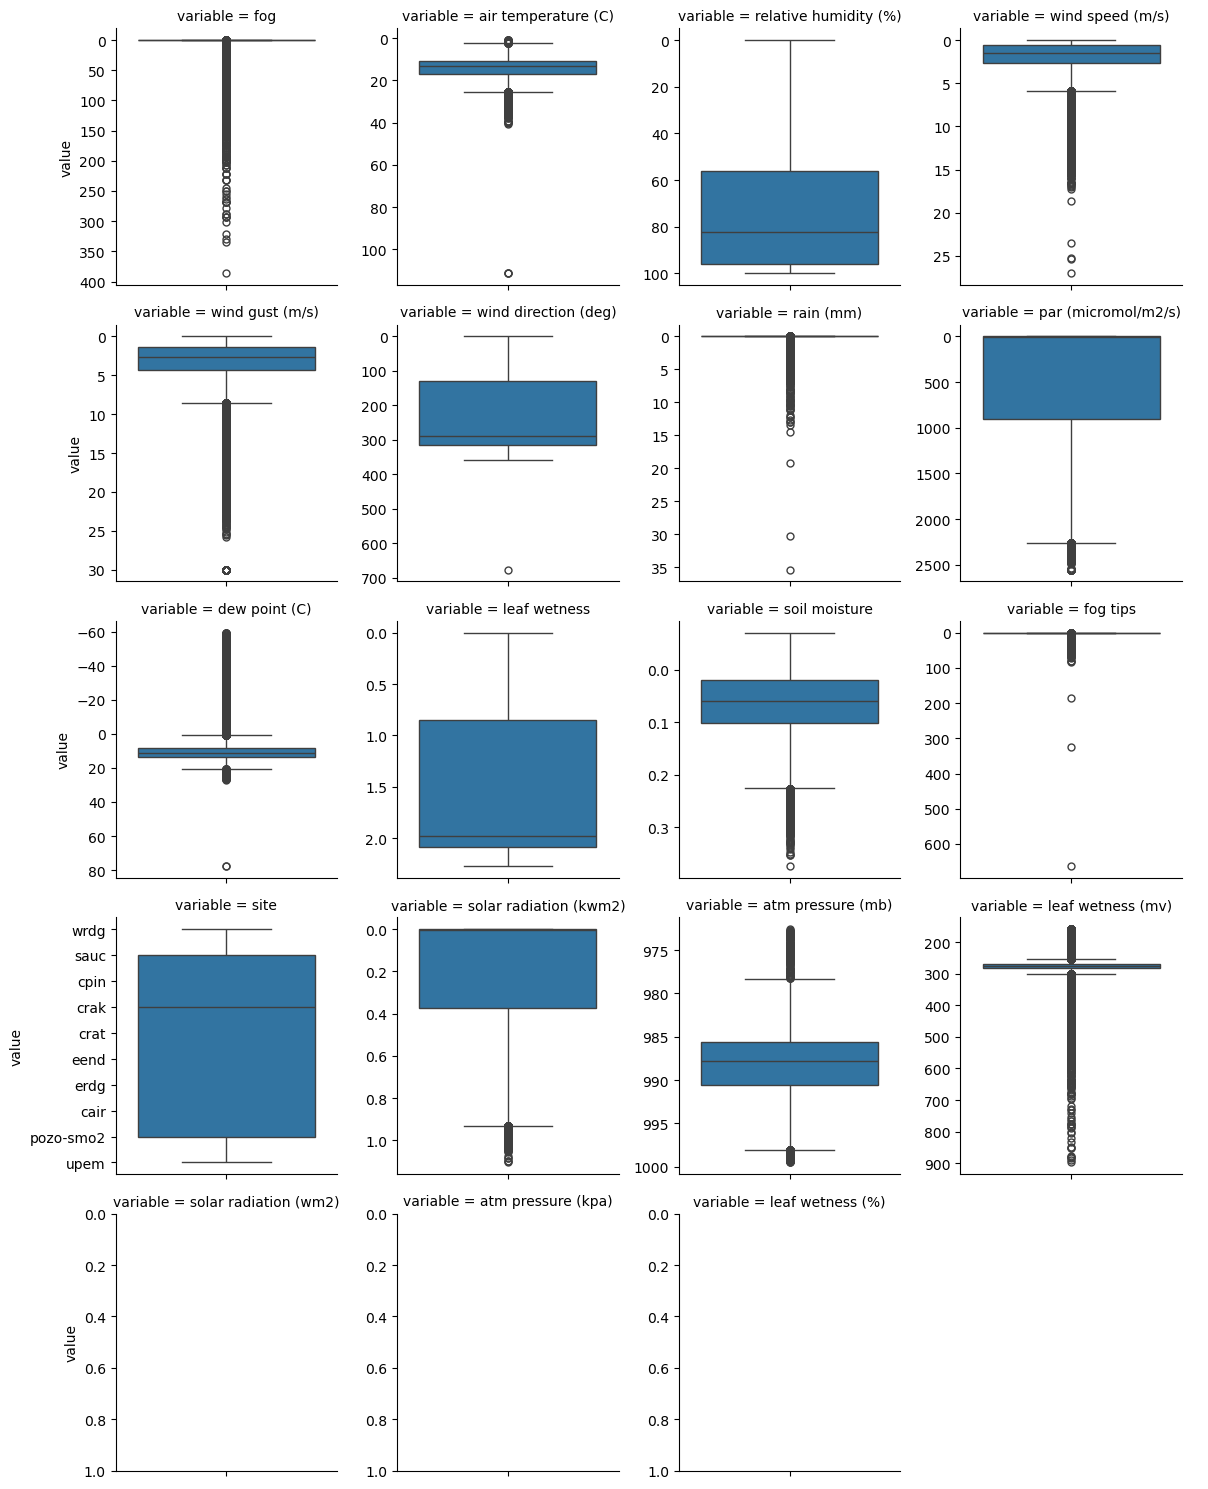

In [35]:
#### Quick plot of distributions ####
# Create long form data
value_col = df.columns.drop(['time (PST)']).tolist()
df_long = pd.melt(df, id_vars=['time (PST)'], value_vars=value_col)

# Plot boxplots
sns.catplot(data=df_long, kind='box', col='variable', y='value',
            sharey=False, height=3, col_wrap=4)
plt.show()


# Write out combined dataframe

In [36]:
df.to_csv(outfpath)
outfpath

PosixPath('/Users/patmccornack/Documents/ucsb_fog_project/_repositories/sci-fog-analysis/data/02-clean/combined_sites.csv')